In [1]:
!pip install -q tensorflow opencv-python


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

data_path = '/content/drive/MyDrive/Tree_Species_Dataset/'
for root, dirs, files in os.walk(data_path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files[:5])  # Only showing 5 files to keep it clean
    break


Root: /content/drive/MyDrive/Tree_Species_Dataset/
Directories: ['sitafal', 'other', 'saptaparni', 'simlo', 'vad', 'sugarcane', 'sonmahor', 'pipal', 'pilikaren', 'shirish', 'mango', 'motichanoti', 'gulmohor', 'neem', 'nilgiri', 'khajur', 'kanchan', 'gunda', 'jamun', 'kesudo', 'bamboo', 'bili', 'amla', 'garmalo', 'asopalav', 'banyan', 'coconut', 'cactus', 'champa', 'babul', '.git']
Files: []


amla: 50 images
asopalav: 50 images
babul: 50 images
bamboo: 50 images
banyan: 50 images
bili: 50 images
cactus: 50 images
champa: 50 images
coconut: 50 images
garmalo: 50 images
gulmohor: 50 images
gunda: 50 images
jamun: 50 images
kanchan: 50 images
kesudo: 50 images
khajur: 50 images
mango: 50 images
motichanoti: 50 images
neem: 50 images
nilgiri: 50 images
other: 150 images
pilikaren: 50 images
pipal: 50 images
saptaparni: 50 images
shirish: 50 images
simlo: 50 images
sitafal: 50 images
sonmahor: 50 images
sugarcane: 50 images
vad: 50 images


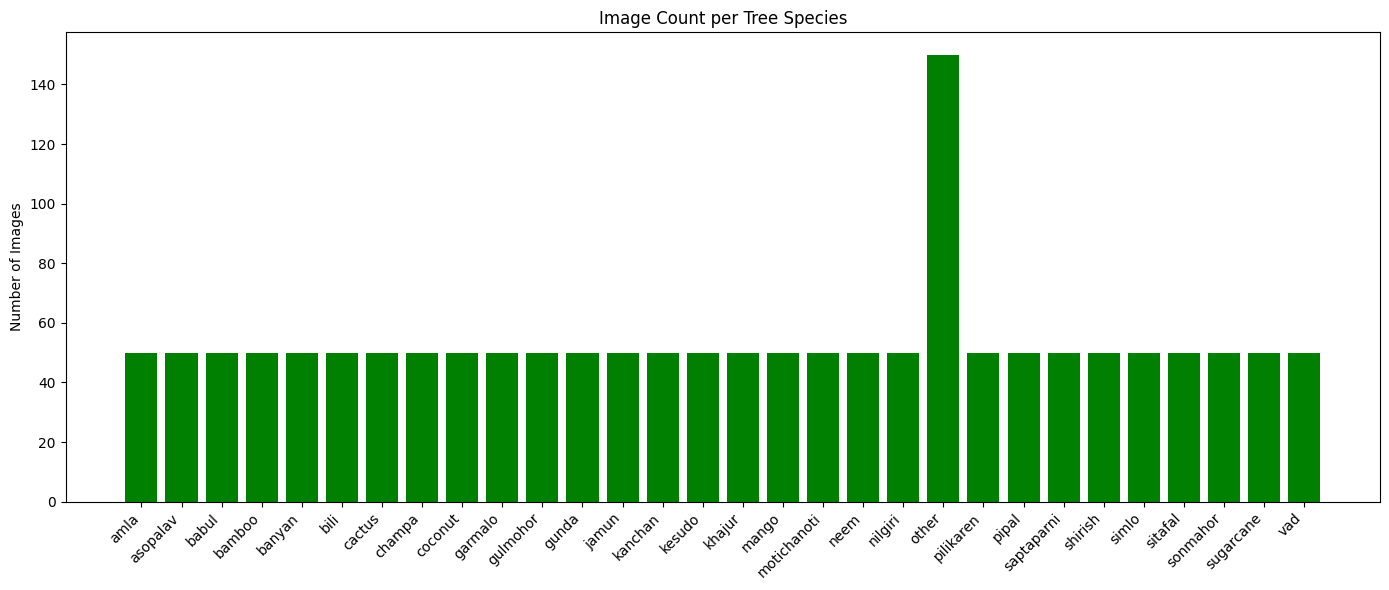

In [4]:
import os
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/Tree_Species_Dataset'
class_names = sorted(os.listdir(data_dir))

# Remove hidden folders like `.git`
class_names = [c for c in class_names if not c.startswith('.')]

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}

# Display counts
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Bar chart 📊
plt.figure(figsize=(14,6))
plt.bar(class_counts.keys(), class_counts.values(), color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Tree Species")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()



In [5]:
from PIL import Image

corrupted = []

for cls in class_names:
    folder_path = os.path.join(data_dir, cls)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Will throw error if corrupted
        except:
            print(f"Corrupted image found: {file_path}")
            corrupted.append(file_path)

# Optional: remove corrupted images
for bad_file in corrupted:
    os.remove(bad_file)

print(f"✅ Removed {len(corrupted)} corrupted images.")


✅ Removed 0 corrupted images.


In [6]:
import random
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(16, 10))

for i, cls in enumerate(random.sample(class_names, 9)):
    folder_path = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Random Images from 9 Tree Species", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

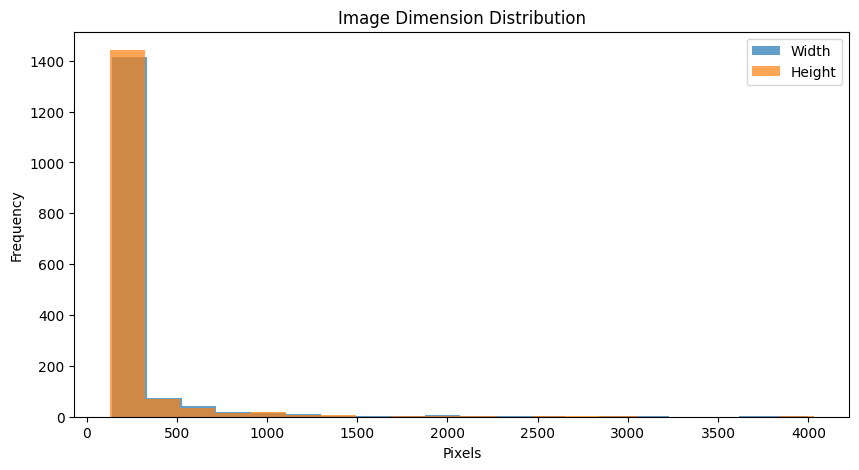

In [7]:
from PIL import Image

widths = []
heights = []

for cls in class_names:
    folder_path = os.path.join(data_dir, cls)
    for filename in os.listdir(folder_path):
        path = os.path.join(folder_path, filename)
        try:
            with Image.open(path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            continue

# Plot image size distribution
plt.figure(figsize=(10,5))
plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.title("Image Dimension Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/tmp/ipython-input-4243610706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), palette='viridis')


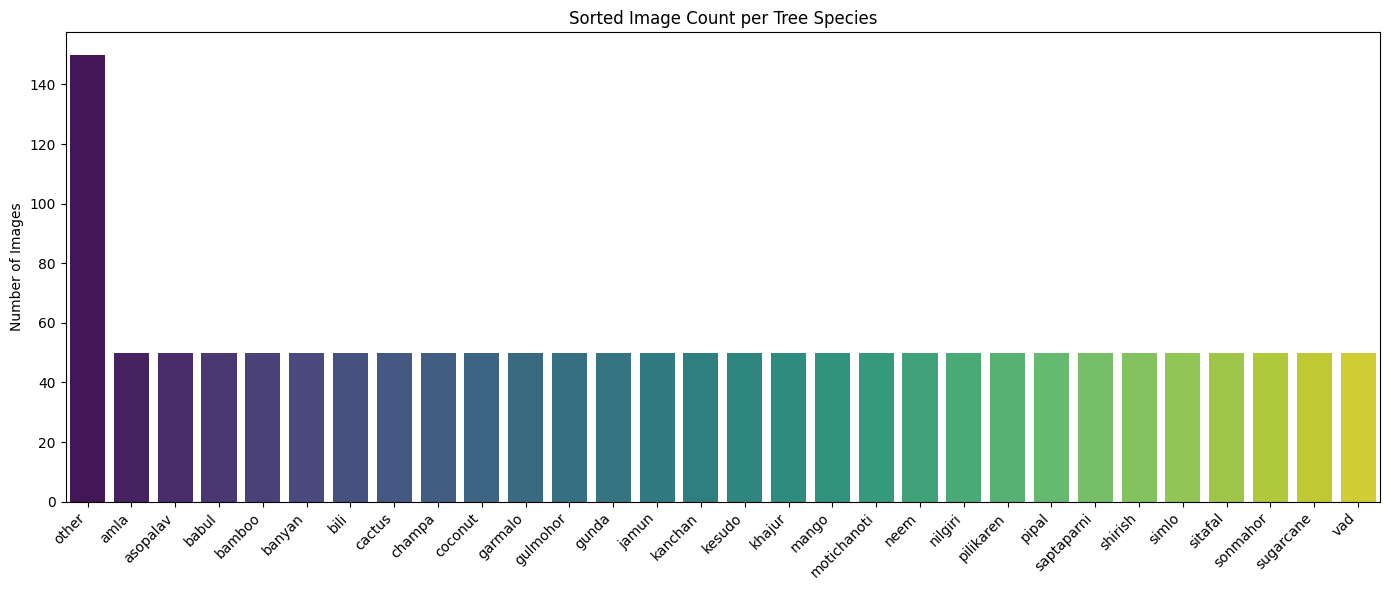

In [8]:
import seaborn as sns

# Sorted by count
sorted_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(14,6))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Sorted Image Count per Tree Species")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


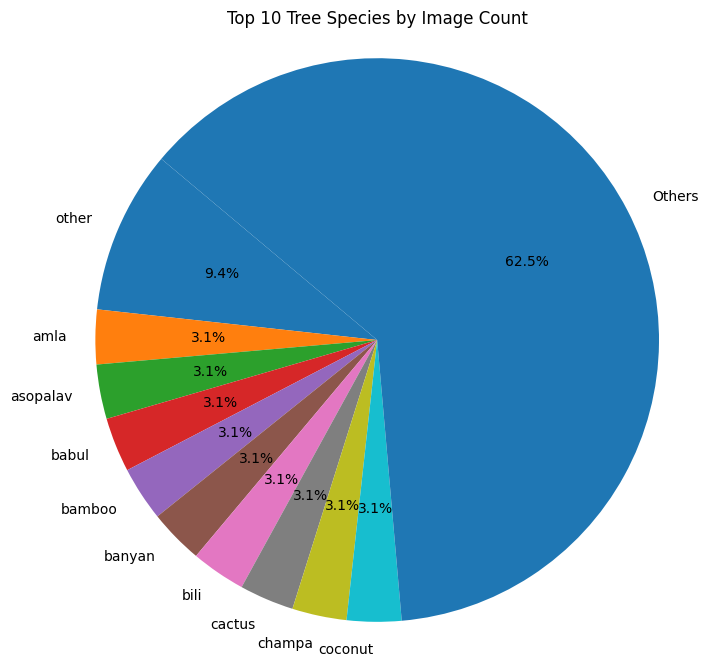

In [9]:
import numpy as np

# Top 10 species
top_classes = dict(sorted_counts)
top_10 = dict(list(top_classes.items())[:10])
others_sum = sum(list(top_classes.values())[10:])
top_10['Others'] = others_sum

plt.figure(figsize=(8,8))
plt.pie(top_10.values(), labels=top_10.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Tree Species by Image Count")
plt.axis('equal')
plt.show()


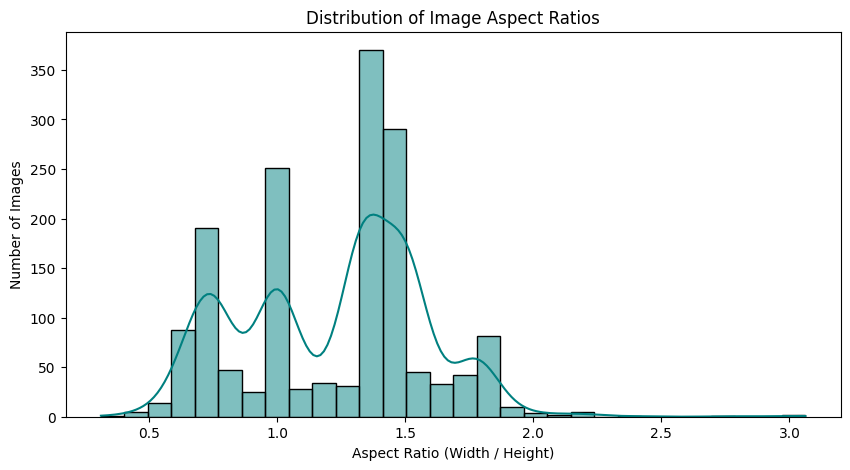

In [10]:
aspect_ratios = [w / h for w, h in zip(widths, heights)]

plt.figure(figsize=(10,5))
sns.histplot(aspect_ratios, bins=30, kde=True, color='teal')
plt.title("Distribution of Image Aspect Ratios")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Number of Images")
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [13]:
data_dir = '/content/drive/MyDrive/Tree_Species_Dataset/'

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,253,535 (84.89 MB)

 Trainable params: 22,253,087 (84.89 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20  # Start with 10 for testing, then go for 20-30 epochs.
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 208s 5s/step - accuracy: 0.0860 - loss: 5.9232 - val_accuracy: 0.0469 - val_loss: 3.6885
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.1718 - loss: 4.3454 - val_accuracy: 0.0344 - val_loss: 4.1655
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.2540 - loss: 3.5620 - val_accuracy: 0.0375 - val_loss: 5.1068
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 209s 5s/step - accuracy: 0.2402 - loss: 3.4226 - val_accuracy: 0.0406 - val_loss: 5.8516
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.2814 - loss: 3.1360 - val_accuracy: 0.0562 - val_loss: 7.4876
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.3230 - loss: 2.9190 - val_accuracy: 0.0312 - val_loss: 8.4479
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 212s 5s/step - accuracy: 0.2916 - loss: 2.9291 - val_accuracy: 0.0625 - val_loss: 8.2323
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.2811 - loss: 2.9036 - val_accuracy: 0.0812 - v

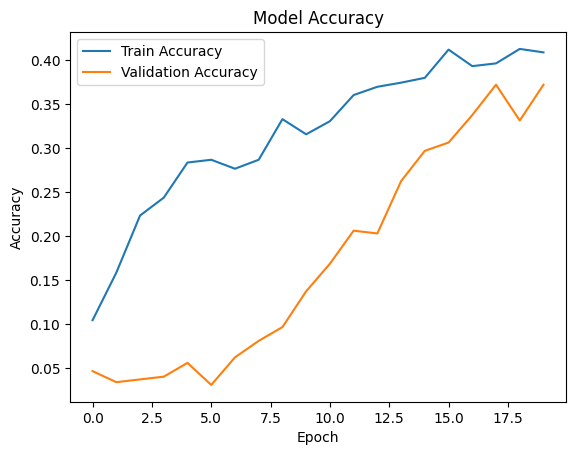

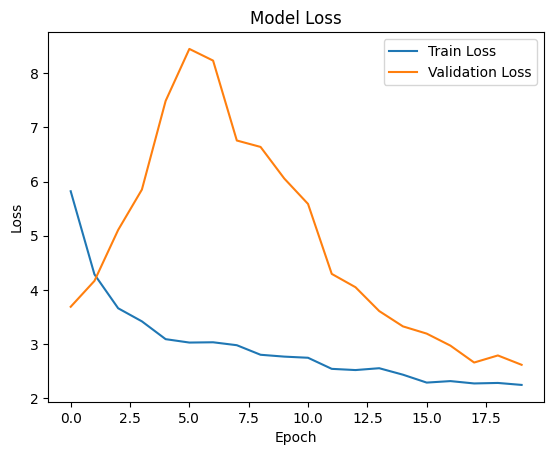

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [17]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4103 - loss: 2.4375
Validation Accuracy: 0.37


In [21]:
model.save('tree_species_model.h5')    # Legacy, for compatibility
model.save('tree_species_model.keras') # Native, for future use


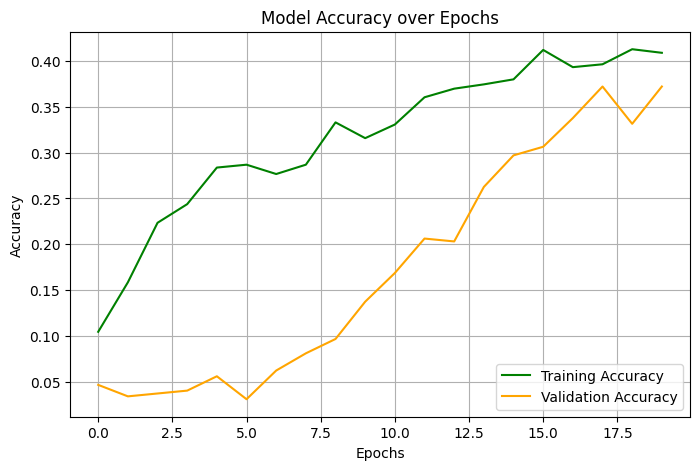

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
